In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from sklearn.model_selection import train_test_split

In [57]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [58]:
#Carga de DataSet
data= pd.read_csv("/content/drive/MyDrive/SIS420-IA/DATASET/breast_cancer.csv")

In [59]:
print(data)

     Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0                  5                        1                         1   
1                  5                        4                         4   
2                  3                        1                         1   
3                  6                        8                         8   
4                  4                        1                         1   
..               ...                      ...                       ...   
678                3                        1                         1   
679                2                        1                         1   
680                5                       10                        10   
681                4                        8                         6   
682                4                        8                         8   

     Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
0                    1         

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [61]:
# Crear una nueva columna 'Class_binaria' basada en la transformación
data['Class_binaria'] = data['Class'].apply(lambda x: 0 if x == 2 else 1)

# Ahora, 'Class_binaria' contiene los valores convertidos (0 y 1)
print(data)

     Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0                  5                        1                         1   
1                  5                        4                         4   
2                  3                        1                         1   
3                  6                        8                         8   
4                  4                        1                         1   
..               ...                      ...                       ...   
678                3                        1                         1   
679                2                        1                         1   
680                5                       10                        10   
681                4                        8                         6   
682                4                        8                         8   

     Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
0                    1         

In [62]:
# Eliminar columnas innecesarias
columna_eliminar=['Class']
data = data.drop(columna_eliminar, axis=1)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class_binaria                683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [64]:
# Division de dataset en entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [65]:
print(train_data)

     Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
437                3                        1                         1   
256                7                        9                         4   
584                5                        2                         4   
18                10                        7                         7   
350                2                        1                         1   
..               ...                      ...                       ...   
71                 9                        4                         5   
106                1                        1                         1   
270               10                        5                         7   
435                4                        1                         1   
102               10                       10                        10   

     Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
437                  3         

In [66]:
print(test_data)

     Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
292                8                        3                         4   
145                8                        8                         7   
211                1                        1                         1   
118                1                        1                         2   
302                1                        1                         1   
..               ...                      ...                       ...   
110               10                        3                         3   
82                 3                        5                         7   
51                 5                        5                         5   
210                1                        1                         1   
548                3                        1                         1   

     Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
292                  9         

In [67]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 437 to 102
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              546 non-null    int64
 1   Uniformity of Cell Size      546 non-null    int64
 2   Uniformity of Cell Shape     546 non-null    int64
 3   Marginal Adhesion            546 non-null    int64
 4   Single Epithelial Cell Size  546 non-null    int64
 5   Bare Nuclei                  546 non-null    int64
 6   Bland Chromatin              546 non-null    int64
 7   Normal Nucleoli              546 non-null    int64
 8   Mitoses                      546 non-null    int64
 9   Class_binaria                546 non-null    int64
dtypes: int64(10)
memory usage: 46.9 KB


In [68]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 292 to 548
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              137 non-null    int64
 1   Uniformity of Cell Size      137 non-null    int64
 2   Uniformity of Cell Shape     137 non-null    int64
 3   Marginal Adhesion            137 non-null    int64
 4   Single Epithelial Cell Size  137 non-null    int64
 5   Bare Nuclei                  137 non-null    int64
 6   Bland Chromatin              137 non-null    int64
 7   Normal Nucleoli              137 non-null    int64
 8   Mitoses                      137 non-null    int64
 9   Class_binaria                137 non-null    int64
dtypes: int64(10)
memory usage: 11.8 KB


In [69]:
train_data.to_csv("entrenamiento.csv", index=False)

In [70]:
test_data.to_csv("prueba.csv", index=False)

In [71]:
#Carga de dataset
data = pd.read_csv('/content/entrenamiento.csv')

In [72]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 437 to 102
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              546 non-null    int64
 1   Uniformity of Cell Size      546 non-null    int64
 2   Uniformity of Cell Shape     546 non-null    int64
 3   Marginal Adhesion            546 non-null    int64
 4   Single Epithelial Cell Size  546 non-null    int64
 5   Bare Nuclei                  546 non-null    int64
 6   Bland Chromatin              546 non-null    int64
 7   Normal Nucleoli              546 non-null    int64
 8   Mitoses                      546 non-null    int64
 9   Class_binaria                546 non-null    int64
dtypes: int64(10)
memory usage: 46.9 KB


In [73]:
X = data.iloc[:, :9]
y = data.iloc[:, 9]
m = y.size

In [74]:
print(X)
print('*'*25)
print(y)

     Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0                  3                        1                         1   
1                  7                        9                         4   
2                  5                        2                         4   
3                 10                        7                         7   
4                  2                        1                         1   
..               ...                      ...                       ...   
541                9                        4                         5   
542                1                        1                         1   
543               10                        5                         7   
544                4                        1                         1   
545               10                       10                        10   

     Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
0                    3         

In [75]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma


In [76]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

     Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0                  3                        1                         1   
1                  7                        9                         4   
2                  5                        2                         4   
3                 10                        7                         7   
4                  2                        1                         1   
..               ...                      ...                       ...   
541                9                        4                         5   
542                1                        1                         1   
543               10                        5                         7   
544                4                        1                         1   
545               10                       10                        10   

     Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
0                    3         

In [77]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [78]:
#prueba de la implementacion de la Sigmoide
z = 0
g = sigmoid(z)
print ('g(', z,') = ', g)

g( 0 ) =  0.5


In [79]:
#Configuramos la matriz adecuadamente, y agregar una columnas de unos que corresponde al termino de intersepcion
m, n = X.shape
#Agrega el termino de Intercepcion a A
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
print(X[5])

[ 1.         -0.15064499 -0.6898418  -0.72955852 -0.63889328 -0.544251
 -0.68063032 -0.55225606 -0.59477431 -0.33906568]


In [80]:
print(X)

[[ 1.         -0.51298931 -0.6898418  ... -0.9722168  -0.59477431
  -0.33906568]
 [ 1.          0.93638799  1.9303573  ...  0.70762615  0.08390233
   0.8869599 ]
 [ 1.          0.21169934 -0.36231691 ... -0.9722168  -0.59477431
  -0.33906568]
 ...
 [ 1.          2.02342097  0.62025775 ... -0.13229532  0.08390233
   3.95202385]
 [ 1.         -0.15064499 -0.6898418  ... -0.55225606 -0.59477431
  -0.33906568]
 [ 1.          2.02342097  2.25788219 ...  1.96750837  1.78059394
   3.95202385]]


In [81]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [82]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

In [84]:
#Carga de dataset
data = pd.read_csv('/content/prueba.csv')
print(data)

     Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0                  8                        3                         4   
1                  8                        8                         7   
2                  1                        1                         1   
3                  1                        1                         2   
4                  1                        1                         1   
..               ...                      ...                       ...   
132               10                        3                         3   
133                3                        5                         7   
134                5                        5                         5   
135                1                        1                         1   
136                3                        1                         1   

     Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
0                    9         

In [85]:
fila_deseada = 3

if fila_deseada < len(data):
  fila_completa = data.iloc[fila_deseada].to_numpy()
  print(fila_completa)
else:
  print("La fila no existe")

[1 1 2 2 2 1 3 1 1 0]


theta calculado por el descenso por el gradiente: [-0.97469092  0.76647296  0.65636729  0.72705939  0.64477974  0.35230582
  0.99540704  0.73644235  0.51231907  0.47702454]
usando el descenso por el gradiente benigno o maligno :0.9996936625568192


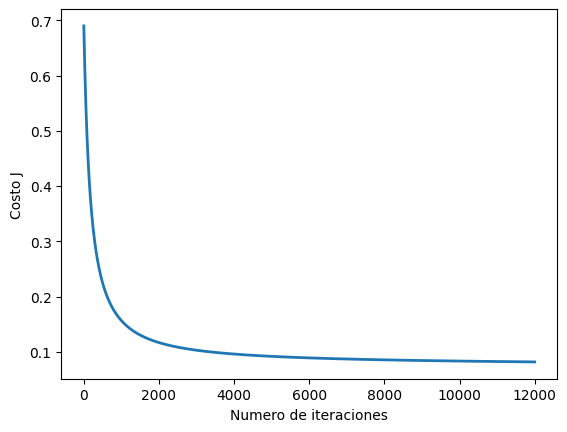

In [96]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.003
num_iters = 12000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(10)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# verificar si ingresa o no a la universidad
X_array = [1, 1, 1, 2, 2, 2, 1, 3, 1, 1]
tiene = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto

print(f"usando el descenso por el gradiente benigno o maligno :{tiene}")

In [97]:
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento
    epsilon = 1e-8
    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h+epsilon)))
    grad = (1 / m) * (h - y).dot(X)

    return J, grad

In [98]:
# Inicializacion de parametros de ajuste
initial_theta = np.zeros(n+1)
print(initial_theta)
cost, grad = costFunction(initial_theta, X, y)

print('Costo en theta inicial (zeros): {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.693\n')
print(grad)
print('Gradiente en theta inicial (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[-0.1000, -12.0092, -11.2628]\n')

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Costo en theta inicial (zeros): 0.693
Costo esperado (aproximado): 0.693

[ 0.16849817 -0.33032336 -0.39097407 -0.39349403 -0.34050201 -0.32597718
 -0.39138038 -0.35995226 -0.33359117 -0.20308737]
Gradiente en theta inicial (zeros):
	[0.1685, -0.3303, -0.3910]
Gradiente esperado (aproximado):
	[-0.1000, -12.0092, -11.2628]



In [99]:
# Establecer las opciones para optimize.minimize
options= {'maxiter': 1000}

# revisar la documentacion de scipy's optimize.minimize para mayor descripcion de los parametros
# La funcion devuekve un objeto `OptimizeResult`
# Se utiliza el algoritmo de Newton truncado para la optimización.
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# la propiedad fun del objeto devuelto por `OptimizeResult`
# contiene el valor del costFunction de un theta optimizado
cost = res.fun

# Theta optimizada esta en la propiedad x
theta = res.x

# Imprimir theta en la pantalla
print('Costo con un valor de theta encontrado por optimize.minimize: {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.203\n');

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Theta esperado (aproximado):\n\t[-25.161, 0.206, 0.201]')

Costo con un valor de theta encontrado por optimize.minimize: 0.075
Costo esperado (aproximado): 0.203

theta:
	[-1.556, 1.274, -0.267]
Theta esperado (aproximado):
	[-25.161, 0.206, 0.201]


<ipython-input-99-0dfcfa2e2ef1>:7: OptimizeWarning: Unknown solver options: maxiter
  res = optimize.minimize(costFunction,


In [100]:
# verificar si es maligno o benigno
X_array = [1, 90, 70]
theta_om = [-25.161, 0.206, 0.201]
tiene = sigmoid(np.dot(X_array, theta_om))   # Se debe cambiar esto

print(f"usando el descenso por el gradiente benigno o maligno :{tiene}")

usando el descenso por el gradiente benigno o maligno :0.9994183152095036


In [106]:
def plotDecisionBoundary(plotData, theta, X, y):
    """
    Grafica los puntos X y Y en una nueva figura con un limite de desicion definido por theta.
    the data points X and y into a new figure with the decision boundary defined by theta.
    Grafica los puntos con * para los ejemplos positivos y con o para los ejemplos negativos.

    Parametros:
    ----------
    plotData : func
        A function reference for plotting the X, y data.

    theta : array_like
        Parametros para la regresion logistica. Un vecto de la forma (n+1, ).

    X : array_like
        Data set de entrada. Se supone que X es una de las siguientes:
            1) Matriz Mx3, donde la primera columna es una columna de unos para intercepción.
            2) Matriz MxN, N> 3, donde la primera columna son todos unos.

    y : array_like
        Vector de datos de etiquetas de la forma (m, ).
    """
    # hacer que theta sera un arreglo numpy
    theta = np.array(theta)

    # Graficar los datos (recordar que la primera columna en X es la intercepción)
    plotData(X[:, 1:9], y) #cambiar estos valores depende a las x que tengas

    if X.shape[1] <= 9: #cambiar estos valores depende a las x que tengas
        # Solo se requieren 2 puntos para definir una linea, para lo cual se eligen dos puntos finales
        plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])

        # Calcular la línea límite de decisión
        plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])

        print(plot_x)
        print(plot_y)
        # Graficar y ajustar los ejes para una mejor visualización
        pyplot.plot(plot_x, plot_y)

        # Leyenda, especifica para el ejercicio
        pyplot.legend(['Admitido', 'No admitido', 'Limite de decisión'])
        pyplot.xlim([30, 100])
        pyplot.ylim([30, 100])
    else:
        # Rango de la grilla
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros((u.size, v.size))
        # Evalua z = theta*x sobre la grilla
        for i, ui in enumerate(u):
            for j, vj in enumerate(v):
                z[i, j] = np.dot(mapFeature(ui, vj), theta)

        z = z.T  # importante transponer z antes de llamar al contorno
        # print(z)

        # Plot z = 0
        pyplot.contour(u, v, z, levels=[0], linewidths=2, colors='g')
        pyplot.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)

In [107]:
def predict(theta, X):
    """
    Predecir si la etiqueta es 0 o 1 mediante regresión logística aprendida.
    Calcula las predicciones para X usando un umbral en 0.5 (es decir, si sigmoide (theta.T * x)> = 0.5, predice 1)

    Parametros
    ----------
    theta : array_like
        Parametros para regresion logistica. Un vecto de la forma (n+1, ).

    X : array_like
        Datos utilizados para el calculo de las predicciones.
        La fila es el numero de los puntos para calcular las predicciones,
        y las columnas con el numero de caracteristicas.

    Devuelve
    -------
    p : array_like
        Predicciones y 0 o 1 para cada fila en X.
    """
    m = X.shape[0] # Numero de ejemplo de entrenamiento

    p = np.zeros(m)

    p = np.round(sigmoid(X.dot(theta.T)))
    return p

In [108]:
#  Predice la probabilidad de ingreso para un estudiante con nota de 45 en el examen 1 y nota de 85 en el examen 2
prob = sigmoid(np.dot([1, 0.0e+00, 1.0e+00, 7.0e+04, 2.0e+00, 4.0e+00, 4.0e+00, 0.0e+00, 2.0e+00, 4.9e+01], theta))
print('Para un estudiante con notas de 45 y 85, se predice una probabilidad de admisión de: {:.3f}%'.format(prob))
print('Valor esperado: 0.775 +/- 0.002\n')

# Compute accuracy on our training set
p = predict(theta, X)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y) * 100))
print('Precisión esperada (aproximadamente): 89.00 %')

Para un estudiante con notas de 45 y 85, se predice una probabilidad de admisión de: 1.000%
Valor esperado: 0.775 +/- 0.002

Precisión de entrenamiento: 97.07 %
Precisión esperada (aproximadamente): 89.00 %
